# SAM index from the CPC 

In [1]:
%matplotlib inline 

In [2]:
from matplotlib import pyplot as plt 

In [3]:
import sys
import pathlib

In [4]:
import numpy as np 
import pandas as pd 

### URL for the CPC monthly SAM index, this one seems to be regularly updated 

see description of the method at [https://www.cpc.ncep.noaa.gov/products/precip/CWlink/daily_ao_index/history/method.shtml](https://www.cpc.ncep.noaa.gov/products/precip/CWlink/daily_ao_index/history/method.shtml)

To identify the leading teleconnection patterns in the atmospheric circulation, Emperical Orthogonal Function (EOF) was applied to the monthly mean 1000-hPa (**700-hPa**) height anomalies poleward of 20° latitude for the Northern (Southern) Hemisphere. The leading EOF modes capture the maximum amount of explained variance. The **NCEP/NCAR** reanalysis dataset was employed at a horizontal resolution of (lat,lon)=(2.5°X2.5°) for the period 1979 to 2000. The seasonal cycle has been removed from the monthly mean height field. The covariance matrix is used for the EOF analysis. To ensure equal area weighting for the covariance matrix, **the gridded data is weighted by the square root of the cosine of latitude.**

In [5]:
url = 'https://www.cpc.ncep.noaa.gov/products/precip/CWlink/daily_ao_index/aao/monthly.aao.index.b79.current.ascii.table'

In [6]:
sam = pd.read_table(url, sep=r"\s+") 

In [7]:
sam.head()

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
1979,0.209,0.356,0.899,0.678,0.724,1.700,2.412,0.546,0.629,0.160,-0.423,-0.951
1980,-0.447,-0.980,-1.424,-2.068,-0.479,0.286,-1.944,-0.997,-1.701,0.577,-2.013,-0.356
1981,0.231,0.039,-0.966,-1.462,-0.344,0.352,-0.986,-2.118,-1.509,-0.260,0.626,1.116
1982,-0.554,0.277,1.603,1.531,0.118,0.920,-0.415,0.779,1.580,-0.702,-0.849,-1.934
1983,-1.340,-1.081,0.166,0.149,-0.437,-0.263,1.114,0.792,-0.696,1.193,0.727,0.475


In [8]:
sam.tail()

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
2018,1.275,1.041,0.141,-1.166,-0.077,-0.012,0.377,-0.343,1.458,0.530,0.991,0.930
2019,0.677,-0.500,0.745,0.336,0.335,1.465,-0.390,-1.080,0.563,-0.925,-1.840,-1.360
2020,-0.231,0.275,1.426,-0.475,0.577,1.071,-0.546,-0.720,0.194,1.264,0.813,1.481
2021,1.045,1.344,0.086,0.827,0.314,1.203,-0.424,-0.190,1.361,0.460,1.310,2.159
2022,0.836,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
sam = sam.stack()

In [10]:
sam.index = pd.date_range(start='1979-01-31', freq='M', periods=len(sam))

In [11]:
sam = sam.to_frame(name='SAM')

In [12]:
sam.head()

,SAM
1979-01-31,0.209
1979-02-28,0.356
1979-03-31,0.899
1979-04-30,0.678
1979-05-31,0.724


In [13]:
sam.tail()

,SAM
2021-09-30,1.361
2021-10-31,0.460
2021-11-30,1.310
2021-12-31,2.159
2022-01-31,0.836


<AxesSubplot:>

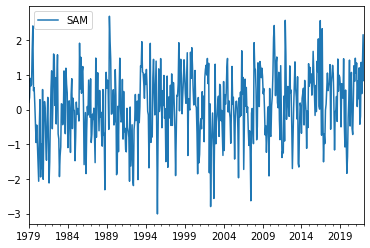

In [14]:
sam.plot()